In [45]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

In [46]:
item_categories = pd.read_csv('item_categories.csv')
items = pd.read_csv('items.csv.zip')
sales_train = pd.read_csv('sales_train.csv.zip',  parse_dates=['date'], dtype={'date': 'str', 'date_block_num': 'int32', 'shop_id': 'int32','item_id': 'int32', 'item_price': 'float32', 'item_cnt_day': 'int32'})
sample_submissions = pd.read_csv('sample_submission.csv.zip')
shops = pd.read_csv('shops.csv')
test = pd.read_csv('test.csv.zip')

In [47]:
item_categories.head(3)

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2


In [48]:
items.head(3)

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40


In [49]:
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-02-01,0,59,22154,999.000000,1
1,2013-03-01,0,25,2552,899.000000,1
2,2013-05-01,0,25,2552,899.000000,-1
3,2013-06-01,0,25,2554,1709.050049,1
4,2013-01-15,0,25,2555,1099.000000,1


In [50]:
sample_submissions.head(3)

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5


In [51]:
shops.head(3)

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2


In [52]:
test.head(3)

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233


In [53]:
# merge data into one table
train = sales_train.join(items, on = 'item_id', rsuffix='_')\
                    .join(item_categories, on = 'item_category_id', rsuffix = '_')\
                    .join(shops, on = 'shop_id', rsuffix = '_')\
                    .drop(['item_id_', 'shop_id_', 'item_category_id_', 'item_name'], axis=1)

train['item_cnt_day'] = np.abs(train['item_cnt_day'])
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id,item_category_name,shop_name
0,2013-02-01,0,59,22154,999.000000,1,37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""
1,2013-03-01,0,25,2552,899.000000,1,58,Музыка - Винил,"Москва ТРК ""Атриум"""
2,2013-05-01,0,25,2552,899.000000,1,58,Музыка - Винил,"Москва ТРК ""Атриум"""
3,2013-06-01,0,25,2554,1709.050049,1,58,Музыка - Винил,"Москва ТРК ""Атриум"""
4,2013-01-15,0,25,2555,1099.000000,1,56,Музыка - CD фирменного производства,"Москва ТРК ""Атриум"""


In [54]:
# split date
train['date'] = pd.to_datetime(train['date'], format='%m.%Y')
train['day'] = train['date'].dt.day
train['month'] = train['date'].dt.month
train['year'] = train['date'].dt.year

train.head(4)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id,item_category_name,shop_name,day,month,year
0,2013-02-01,0,59,22154,999.000000,1,37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир""",1,2,2013
1,2013-03-01,0,25,2552,899.000000,1,58,Музыка - Винил,"Москва ТРК ""Атриум""",1,3,2013
2,2013-05-01,0,25,2552,899.000000,1,58,Музыка - Винил,"Москва ТРК ""Атриум""",1,5,2013
3,2013-06-01,0,25,2554,1709.050049,1,58,Музыка - Винил,"Москва ТРК ""Атриум""",1,6,2013


In [55]:
# check for missing data
train.isnull().sum()

date                  0
date_block_num        0
shop_id               0
item_id               0
item_price            0
item_cnt_day          0
item_category_id      0
item_category_name    0
shop_name             0
day                   0
month                 0
year                  0
dtype: int64

In [56]:
# group data by month
train_grouped_by_month = train[["month", "date_block_num", "shop_id", "item_id", "item_price", "item_cnt_day", "item_category_id", "year"]].groupby(['date_block_num',"shop_id", "item_id", "item_category_id"]).agg({"item_price":"mean","item_cnt_day":"sum","month":"min", "year":"min"}).reset_index()
train_grouped_by_month.rename(columns={"item_cnt_day": "item_cnt_month"}, inplace=True)

# remove outliers
train_grouped_by_month = train_grouped_by_month.query('item_cnt_month >= 0 and item_cnt_month <= 20 and item_price < 400000')

train_grouped_by_month.head(20)

,date_block_num,shop_id,item_id,item_category_id,item_price,item_cnt_month,month,year
0,0,0,32,40,221.0,6,1,2013
1,0,0,33,37,347.0,3,1,2013
2,0,0,35,40,247.0,1,1,2013
3,0,0,43,40,221.0,1,1,2013
4,0,0,51,57,128.5,2,1,2013
5,0,0,61,43,195.0,1,10,2013
6,0,0,75,40,76.0,1,1,2013
7,0,0,88,40,76.0,1,1,2013
8,0,0,95,40,193.0,1,6,2013
9,0,0,96,40,70.0,1,10,2013


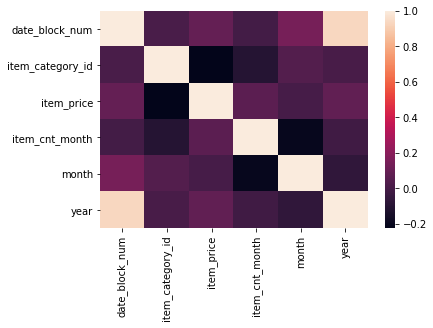

In [57]:
# calculate correlation matrix
sns.heatmap(train_grouped_by_month.drop(['shop_id', 'item_id'], axis=1).corr())

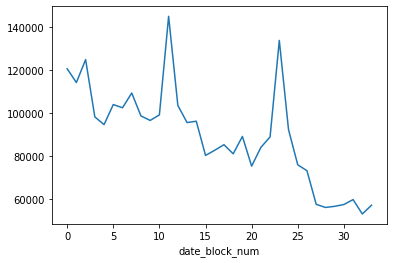

In [62]:
sales_by_date = train_grouped_by_month.groupby(['date_block_num'])['item_cnt_month'].sum()
sales_by_date.plot()

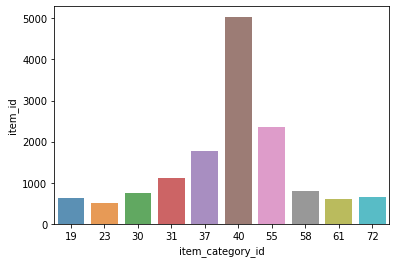

In [65]:
# number of items per category 
x=items.groupby(['item_category_id']).count()
x=x.sort_values(by='item_id',ascending=False)
x=x.iloc[0:10].reset_index()
ax= sns.barplot(x.item_category_id, x.item_id, alpha=0.8)
plt.show()

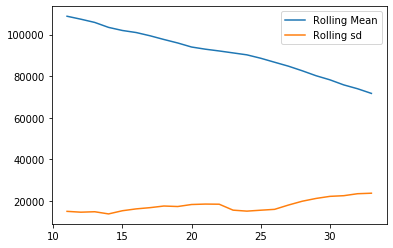

In [66]:
# rolling mean and standart deviation
plt.plot(sales_by_date.rolling(window=12,center=False).mean(),label='Rolling Mean');
plt.plot(sales_by_date.rolling(window=12,center=False).std(),label='Rolling sd');
plt.legend();

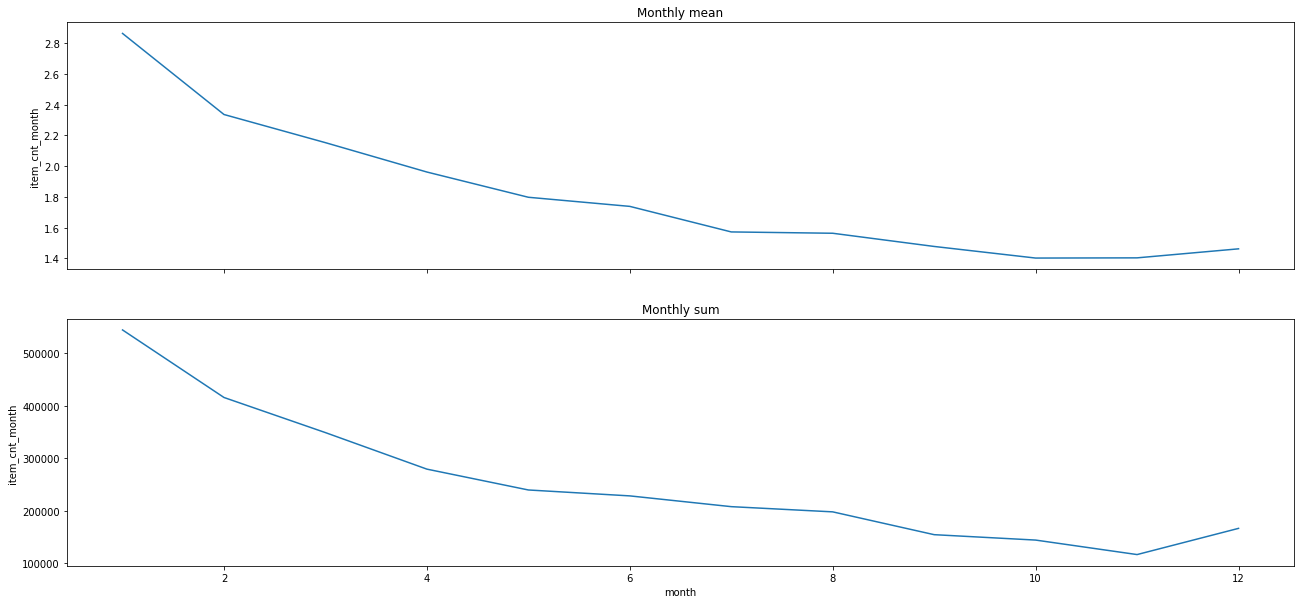

In [67]:
# check for sales statisticks depending on month
month_mean = train_grouped_by_month.groupby(['month'], as_index=False)['item_cnt_month'].mean()
month_sum = train_grouped_by_month.groupby(['month'], as_index=False)['item_cnt_month'].sum()

f, axes = plt.subplots(2, 1, figsize=(22, 10), sharex=True)
sns.lineplot(x="month", y="item_cnt_month", data=month_mean, ax=axes[0]).set_title("Monthly mean")
sns.lineplot(x="month", y="item_cnt_month", data=month_sum, ax=axes[1]).set_title("Monthly sum")
plt.show()

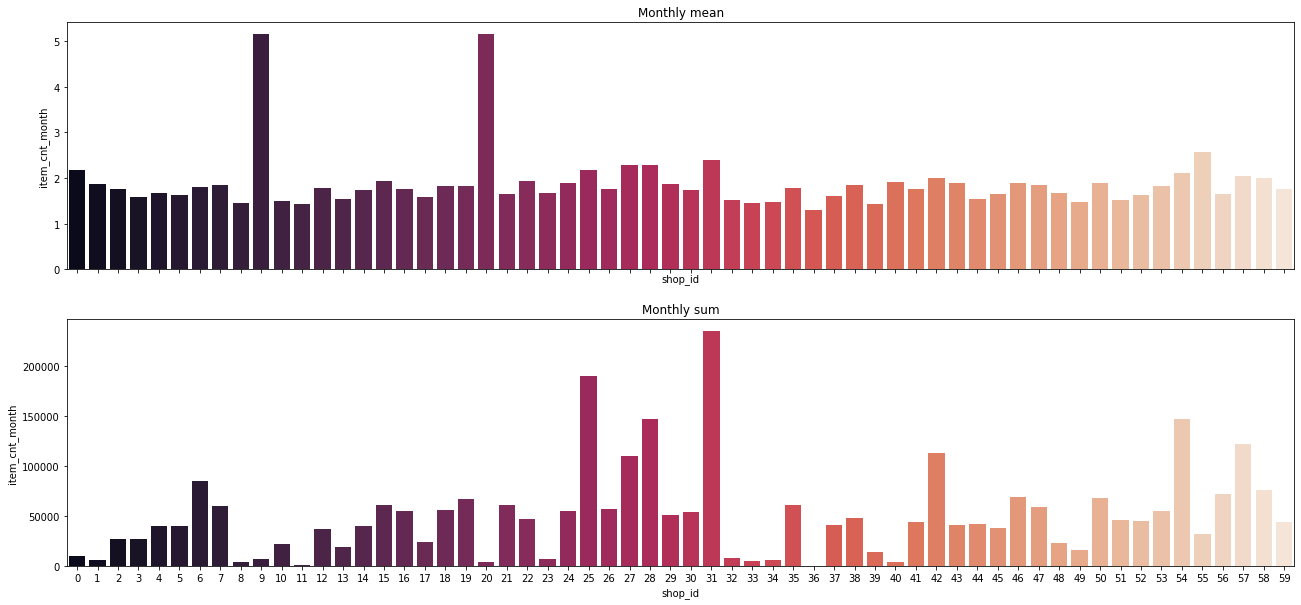

In [68]:
# check for sales statisticks depending on shop
shop_mean = train_grouped_by_month.groupby(['shop_id'], as_index=False)['item_cnt_month'].mean()
shop_sum = train_grouped_by_month.groupby(['shop_id'], as_index=False)['item_cnt_month'].sum()

f, axes = plt.subplots(2, 1, figsize=(22, 10), sharex=True)
sns.barplot(x="shop_id", y="item_cnt_month", data=shop_mean, ax=axes[0], palette="rocket").set_title("Monthly mean")
sns.barplot(x="shop_id", y="item_cnt_month", data=shop_sum, ax=axes[1], palette="rocket").set_title("Monthly sum")
plt.show()